# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.143384e+01     6.899386e+00
 * time: 0.001875162124633789
     1     3.062303e+01     4.400625e+00
 * time: 0.006385087966918945
     2     2.120639e+01     5.055634e+00
 * time: 0.01093602180480957
     3     1.573226e+01     4.133610e+00
 * time: 0.015630006790161133
     4     1.172759e+01     1.624955e+00
 * time: 0.020359039306640625
     5     1.002599e+01     1.075746e+00
 * time: 0.024708032608032227
     6     9.603843e+00     1.389119e+00
 * time: 0.028370141983032227
     7     9.253618e+00     8.554336e-01
 * time: 0.08298206329345703
     8     8.877105e+00     1.012704e+00
 * time: 0.08654212951660156
     9     8.616410e+00     6.391854e-01
 * time: 0.09031105041503906
    10     8.432793e+00     5.154342e-01
 * time: 0.09368300437927246
    11     8.308575e+00     5.402732e-01
 * time: 0.09736800193786621
    12     8.194272e+00     5.329358e-01
 * time: 0.10108613967895508
    13     8.073522e+00     3.688260e-01
 *

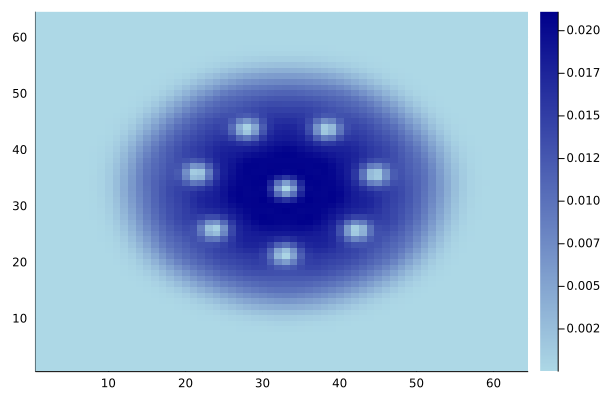

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)